<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from matplotlib.cbook import boxplot_stats

In [2]:
#исходные данные задачи 
##### PART 1
n=5000
mu, sigma = 0,1 
# mean and standard deviation

In [3]:

s = [
    1.13, 1.27, 1.41, 1.56, 0.93, 1.11, 1.72, 1.33, 0.99, 0.77,
    1.08, 0.88, 0.71, 1.17, 1.21, 0.79, 0.91, 1.05, 1.15, 1.01,
    0.76, 0.95, 1.18, 0.89, 1.24, 0.93, 0.77, 1.41, 1.77, 0.81,
    1.57, 0.91, 1.70, 1.44
]


a_estimate=np.mean(s)
sigma_estimate=np.std(s,ddof=1)
print(a_estimate,sigma_estimate**2,"\n")
print(s)

1.1326470588235296 0.08968065953654186 

[1.13, 1.27, 1.41, 1.56, 0.93, 1.11, 1.72, 1.33, 0.99, 0.77, 1.08, 0.88, 0.71, 1.17, 1.21, 0.79, 0.91, 1.05, 1.15, 1.01, 0.76, 0.95, 1.18, 0.89, 1.24, 0.93, 0.77, 1.41, 1.77, 0.81, 1.57, 0.91, 1.7, 1.44]


Axes(0.125,0.11;0.775x0.77)


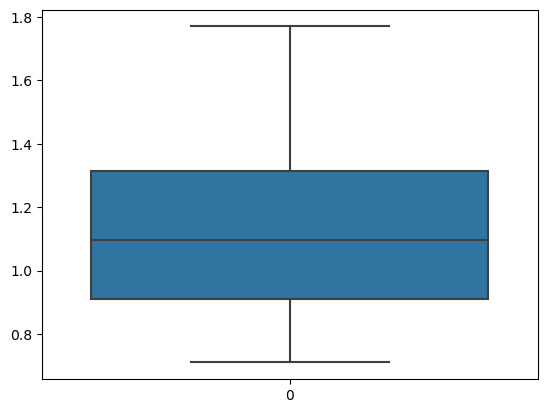

In [4]:
#### вывод ящика с усами
import seaborn as sb
W=sb.boxplot(s)
print(W)

In [5]:
k_bins = 6
count, bin_edges = np.histogram(s,k_bins)
### count содержит абсолютные частоты для каждого интервала
print(count)
print(bin_edges)
sum(count)


[7 9 7 5 3 3]
[0.71       0.88666667 1.06333333 1.24       1.41666667 1.59333333
 1.77      ]


34

5.660377358490566
0.9999999999999998
1.136078431372549
0.07635873440285204


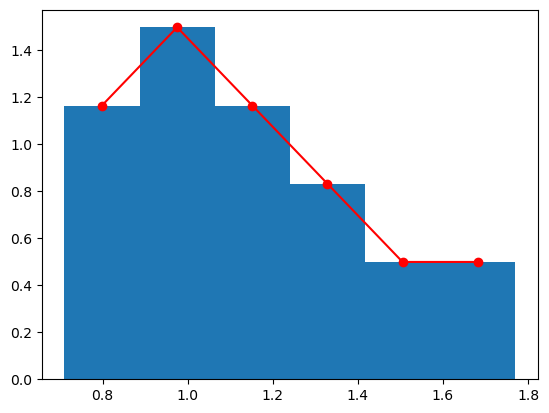

In [10]:
k_bins= 6
count, bins, ignored  = plt.hist(s, k_bins, density=True)
### гистограмма частот: сумма высот прямоугольников равна объему выборки
print(sum(count))
print(sum(count*(bin_edges[1]-bin_edges[0])))

mid_bins = (bins[:-1] + bins[1:]) / 2
plt.plot(mid_bins, count, marker='o', color='red', label='Полигон относительных частот')


counts, _ = np.histogram(s, bins=bins)
relative_frequencies = counts / len(s)

mid_intervals = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
weighted_mean = sum(mid_intervals[i] * counts[i] for i in range(len(counts))) / len(s)
weighted_variance = sum(((mid_intervals[i] - weighted_mean) ** 2) * counts[i] for i in range(len(counts))) / (len(s) - 1)

print(weighted_mean)
print(weighted_variance)


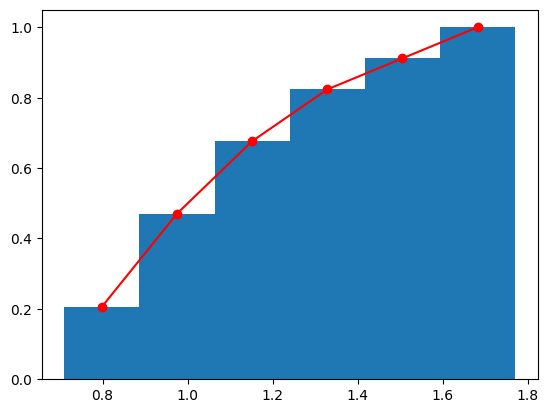

In [26]:
k_bins= 6
count, bins, ignored  = plt.hist(s, k_bins, density=True, cumulative=True)

mid_bins = (bins[:-1] + bins[1:]) / 2
plt.plot(mid_bins, count, marker='o', color='red', label='Полигон относительных частот')

Axes(0.125,0.11;0.775x0.77)
[]


TypeError: only integer scalar arrays can be converted to a scalar index

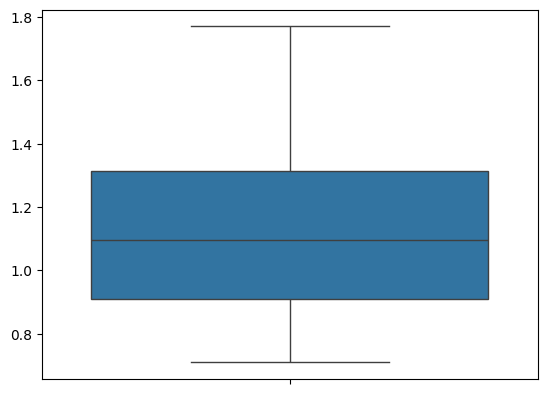

In [13]:
W=sb.boxplot(s)
print(W)          
out = boxplot_stats(s)
out=out[0]
print(out['fliers'])

q1 = np.percentile(s, 25)
q3 = np.percentile(s, 75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Выбор выбросов
outliers = s[(s < lower_bound) | (s > upper_bound)]
print("Выбросы:", outliers)

        


TypeError: 'int' object is not callable